# CIDM6351 Homework 4 Data Engineering Project Instructions

In this homework, you will perform a data engineering project on a dataset of your choosing.

Learning Objectives: Students will be able to...
1. load data from a variety of sources
2. perform data engineering tasks to clean and transform the data
3. analize the data to answer research questions
4. create visualizations that support the researchers conclusions
5. communicate in written form the main findings
6. Webscrap a website to gather data

Deliverable Tasks:   
1. Copy and save a copy of this Google Colab notebook to your notebook.
2. Change the Share's General Access of your notebook to "Anyone with a link" so that the professor can see your code.
3. When done, deliver the URL of your notebook to \\WTclass\cidm6351\lessons\Week 13\Homework 4\

Note there are two questions to this assignment. The first question is regarding a data project of your choosing. The second question is a task to webscrap data from a website identified by Dr. Humpherys.  <br>


## Task 1.1 Data Engineering on Data of Your Choosing

1. Find and import data to analize. Consider a topic that interest you. Consider searching Google with "dataset for machine learning" or search Kaggle for interesting datasets. https://www.kaggle.com/datasets
(https://www.kaggle.com/datasets/pushkar007/us-livestock-meat-exports?resource=download)

2. Explore your data. Get to know the data, structure, meaning of columns, and possible problems with the data.
3. Think of some research questions you may be able to answer using your data.
4. Make <b>at least 10 cleaning or transforming operations</b> on the data. This learning objective demonstrates your ability to data engineer. You choose the manipulations as you see fit. Cleaning and transforming can include but not limited to, filter, drop nulls, remove columns, rename columns, split columns into two, concantenate data, categorize, group by, agregate, create new columns, data type conversion, date manipulations, combining with other datasets, removing unwanted characters, etc. Importing and visualizations are not considered cleaning or transforming.
5. Label and number the 10 cleanning or transforming operation tasks with a comment so the professor can easily count your 10 operations and understand your code, e.g. "#1. create a new column 'Sales_2022' by summing the prior 12 months sales."
6. Note. There are lots of ways to store data to load in Colab. The downside is that when your Colab notebook disconnects from the runtime all your data is gone. The easiest way is to persist your data is to put your datafiles on github.com and link to the raw version of your datafiles. In your past assignments, you have been loading data from my github.com repo. Here is a 3 minute video on how to link to a raw file on github. https://www.screencast.com/t/vwmJmGRH

In [ ]:
# Enter your Project 1.1 code here

import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import BytesIO
from zipfile import ZipFile

def extract(file_path):
  # Download the zip file (csv file was too big to store on github)
  response = requests.get(file_path)
  response.raise_for_status()  # Raise an exception for bad status codes

  # Create a ZipFile object from the response content
  with ZipFile(BytesIO(response.content)) as zip_file:
    # Extract all files from the zip archive
    zip_file.extractall()

  # Load data from LivestockMeat_Exports.csv
  try:
    return pd.read_csv('LivestockMeat_Exports.csv')
  except FileNotFoundError:
    print("Error: 'LivestockMeat_Exports.csv' not found in the extracted archive. "
          "Check the file name and ensure it's in the archive.")

def explore(raw_df):
  # Explore the data
  print(f"Shape of raw_df = {raw_df.shape}") # 1,382,154 records and 10 columns
  print("raw_df.head()")
  print(raw_df.head())
  print("raw_df.types")
  print(raw_df.dtypes)
  print("raw_df.describe()")
  print(raw_df.describe())

  # Any missing data or rows
  print(raw_df.isnull().sum()) # 351,180 rows have NaN for HS_CODE

  # List of columns to exclude
  exclude_columns = ['AMOUNT']

  # Loop through columns in the DataFrame (excluding 'AMOUNT')
  for column in raw_df.columns:
      if column not in exclude_columns:
          # Get the number of unique values in the current column
          unique_count = raw_df[column].nunique()

          # Print the result
          print(f"Number of unique {column} values: {unique_count}")
  print(raw_df['COMMODITY_DESC'].unique())


raw_df = extract("https://github.com/lbrackentx/CIDM6351/blob/main/archive.zip?raw=true")
explore(raw_df)

# Transform Data to answer questions
df = raw_df.copy()
# 1. Drop columns not relevant to analysis
df.drop(['HS_CODE', 'GEOGRAPHY_CODE'], axis=1, inplace=True)

# 2. Rename YEAR_ID to YEAR
df.rename(columns={'YEAR_ID': 'YEAR'}, inplace=True)

# 3. Create and fill the COMMODITY_CAT column based on COMMODITY_DESC
df['COMMODITY_CAT'] = 'Other'  # Initialize with 'Other'
df.loc[df['COMMODITY_DESC'].str.contains('Bird', case=False, na=False), 'COMMODITY_CAT'] = 'Bird'
df.loc[df['COMMODITY_DESC'].str.contains('Bovine', case=False, na=False), 'COMMODITY_CAT'] = 'Bovine'
df.loc[df['COMMODITY_DESC'].str.contains('Beef', case=False, na=False), 'COMMODITY_CAT'] = 'Cattle'
df.loc[df['COMMODITY_DESC'].str.contains('Cattle', case=False, na=False), 'COMMODITY_CAT'] = 'Cattle'
df.loc[df['COMMODITY_DESC'].str.contains('Veal', case=False, na=False), 'COMMODITY_CAT'] = 'Cattle'
df.loc[df['COMMODITY_DESC'].str.contains('Cattle', case=False, na=False), 'COMMODITY_CAT'] = 'Cattle'
df.loc[df['COMMODITY_DESC'].str.contains('Chicken', case=False, na=False), 'COMMODITY_CAT'] = 'Chicken'
df.loc[df['COMMODITY_DESC'].str.contains('Broiler', case=False, na=False), 'COMMODITY_CAT'] = 'Chicken'
df.loc[df['COMMODITY_DESC'].str.contains('Egg', case=False, na=False), 'COMMODITY_CAT'] = 'Egg'
df.loc[df['COMMODITY_DESC'].str.contains('Goat', case=False, na=False), 'COMMODITY_CAT'] = 'Goat'
df.loc[df['COMMODITY_DESC'].str.contains('Lamb', case=False, na=False), 'COMMODITY_CAT'] = 'Lamb'
df.loc[df['COMMODITY_DESC'].str.contains('Mutton', case=False, na=False), 'COMMODITY_CAT'] = 'Sheep'
df.loc[df['COMMODITY_DESC'].str.contains('Sheep', case=False, na=False), 'COMMODITY_CAT'] = 'Sheep'
df.loc[df['COMMODITY_DESC'].str.contains('Bacon', case=False, na=False), 'COMMODITY_CAT'] = 'Swine'
df.loc[df['COMMODITY_DESC'].str.contains('Ham', case=False, na=False), 'COMMODITY_CAT'] = 'Swine'
df.loc[df['COMMODITY_DESC'].str.contains('Hog', case=False, na=False), 'COMMODITY_CAT'] = 'Swine'
df.loc[df['COMMODITY_DESC'].str.contains('Pork', case=False, na=False), 'COMMODITY_CAT'] = 'Swine'
df.loc[df['COMMODITY_DESC'].str.contains('Swine', case=False, na=False), 'COMMODITY_CAT'] = 'Swine'
df.loc[df['COMMODITY_DESC'].str.contains('Turkey', case=False, na=False), 'COMMODITY_CAT'] = 'Turkey'

# 4. Group yearly sums by COMMODITY_CAT, UNIT_DESC, YEAR_ID
yearly_sums = df.groupby(['COMMODITY_CAT','UNIT_DESC','YEAR'])['AMOUNT'].sum().reset_index()

# 5. Use groupby and pct_change to calculate percent change between years by COMMODITY_CAT, UNIT_DESC (YEAR is not necessary since it was in previous group by)
yearly_sums['pct_change'] = yearly_sums.groupby(['COMMODITY_CAT','UNIT_DESC'])['AMOUNT'].pct_change() * 100

# 6. Use groupby and mean() to calculate cumulative year over year percent change grouped by COMMODITY_CAT, UNIT_DESC (for all years)
average_pct_change = yearly_sums.groupby(['COMMODITY_CAT', 'UNIT_DESC'])['pct_change'].mean().reset_index()

# 7. Rename the 'pct_change' column to 'year_over_year_pct_change'
average_pct_change = average_pct_change.rename(columns={'pct_change': 'year_over_year_pct_change'})

# 8. Use nlargest() to obtain the top 3 rows based on 'overall_pct_change'
top_3_pct_change = average_pct_change.nlargest(3, 'year_over_year_pct_change')
print('top 3 pct change')
print(top_3_pct_change)

# Find top 3 GEOGRAPHY_DESC for each 'COMMODITY_CAT and UNIT_DESC' groups inside top_3_pct_change

# 9. Merge dataframes to get top GEOGRAPHY_DESC
merged_df = pd.merge(df, top_3_pct_change, on=['COMMODITY_CAT', 'UNIT_DESC'], how='inner')
merged_df.drop(['year_over_year_pct_change'], axis=1, inplace=True)

# Similar transformations as 4-8 but add GEOGRAPHY_DESC
# 10. Use groupby and sum() to group yearly sums by COMMODITY_CAT, UNIT_DESC, YEAR, GEOGRAPHY_DESC
geography_yearly_sums = merged_df.groupby(['COMMODITY_CAT','UNIT_DESC', 'GEOGRAPHY_DESC', 'YEAR'])['AMOUNT'].sum().reset_index()

# 11. Use groupby and pct_change to calculate percent change between years by GEOGRAPHY_DESC, COMMODITY_CAT, UNIT_DESC (YEAR is not necessary since it was in previous group by)
geography_yearly_sums['pct_change'] = geography_yearly_sums.groupby(['COMMODITY_CAT','UNIT_DESC','GEOGRAPHY_DESC'])['AMOUNT'].pct_change() * 100

# 12. Use groupby and mean() to calculate cumulative year over year percent change grouped by COMMODITY_CAT, UNIT_DESC, GEOGRAPHY_DESC (for all years)
geography_average_pct_change = geography_yearly_sums.groupby(['COMMODITY_CAT', 'UNIT_DESC', 'GEOGRAPHY_DESC'])['pct_change'].mean().reset_index()

# 13. Rename the 'pct_change' column to 'geography_year_over_year_pct_change'
geography_average_pct_change = geography_average_pct_change.rename(columns={'pct_change': 'geography_year_over_year_pct_change'})

# 14. Use groupby and apply nlargest() to obtain the top 3 of geography_average_pct_change for each group of COMMODITY_CAT, UNIT_DESC
top_3_geography = geography_average_pct_change.groupby(['COMMODITY_CAT', 'UNIT_DESC']).apply(lambda x: x.nlargest(3, 'geography_year_over_year_pct_change')).reset_index(drop=True)
print("top_3_geography")
print(top_3_geography)

# 15. Use Filter and idmax() to find when was best year for top 3 commodities by unit? (Not accounting for ties)
filtered_yearly_sums = yearly_sums[(yearly_sums['COMMODITY_CAT'].isin(top_3_pct_change['COMMODITY_CAT'])) & (yearly_sums['UNIT_DESC'].isin(top_3_pct_change['UNIT_DESC']))]
best_year = filtered_yearly_sums.groupby(['COMMODITY_CAT', 'UNIT_DESC'])['pct_change'].idxmax()
print("Best Year")
print(filtered_yearly_sums.loc[best_year])

# 16. Use idxmin() to find when was worst year for top 3 commodities by unit? (Not accounting for ties)
worst_year = filtered_yearly_sums.groupby(['COMMODITY_CAT', 'UNIT_DESC'])['pct_change'].idxmin()
print("Worst Year")
print(filtered_yearly_sums.loc[worst_year])

# ADDED after to see if Japan would show up for Cattle
# 17. Use groupby, filter, and apply nsmallest() to find what Geographic Region had the sharpest decline for the top commodities in the year 2004
bottom_1_geography_2004 = geography_yearly_sums[geography_yearly_sums['YEAR'] == 2004].groupby(['COMMODITY_CAT', 'UNIT_DESC']).apply(lambda x: x.nsmallest(1, 'pct_change')).reset_index(drop=True)
print("Bottom for 2004")
print(bottom_1_geography_2004)

Shape of raw_df = (1382154, 10)
raw_df.head()
   SOURCE_ID       HS_CODE                                     COMMODITY_DESC  \
0         63  2.071200e+08         Chickens, nesoi, not cut in pieces, frozen   
1         63  1.602412e+09  Hams and cuts thereof, of swine, boned and coo...   
2         63  2.071200e+08         Chickens, nesoi, not cut in pieces, frozen   
3         63  1.602412e+09  Hams and cuts thereof, of swine, boned and coo...   
4         63  2.071200e+08         Chickens, nesoi, not cut in pieces, frozen   

   GEOGRAPHY_CODE          GEOGRAPHY_DESC  ATTRIBUTE_DESC UNIT_DESC  YEAR_ID  \
0            2482  British Virgin Islands  US Export, QTY        KG     2023   
1            2150                Honduras  US Export, QTY       CWE     2023   
2            5200    United Arab Emirates  US Export, QTY        KG     2023   
3            2740     Trinidad and Tobago  US Export, QTY        KG     2023   
4            7850               Mauritius  US Export, QTY       CWE

<ipython-input-68-c0f62c70fecb>:123: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_geography = geography_average_pct_change.groupby(['COMMODITY_CAT', 'UNIT_DESC']).apply(lambda x: x.nlargest(3, 'geography_year_over_year_pct_change')).reset_index(drop=True)
<ipython-input-68-c0f62c70fecb>:140: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_1_geography_2004 = geography_yearly_sums[geography_yearly

## Task 1.2 Analize Your Data

1. Answer at least two research questions that can be answered using your cleaned and transformed data. Use a textbox to write your two questions and brief answer to the questions. Example: "What are the sales for 2022? Sales were $2 million, an increase of 10% over 2021. " Edit the textbox labeled "Project 1.3 Research Question and Answers" to add your research questions and major findings. Add enough context to explain the data to the reader, who is not familiar. Be sure any values are understandable to the reader (e.g. 0 = yes, 1 = no, etc.)
2. Create a simple visualization(s) that supports your findings. Label your x and y axis (with unit of measure) and add a title to your visualization.

<b>1. Which commodity categories, in terms of unit volume, exhibited the highest rate of year over year growth the 34-year period of the dataset?</b> <br>
Swine, Cattle, and Goat measured in units of NO, are the top 3 commodity categories with the higest year over year rate of growth for the entire dataset. <br>

<b>2. When did the top 3 commodities experience their best and worst annual growth?</b><br>
The best annual growth years for Swine, Cattle, and Goat measured in units of NO are 1991, 2017, and 1996 respectively. The worst years for annual growth were 1995, 2004, and 2004 respectively.

<b>3. Where, geographically, did the 3 top-growing commodity categories by unit volume see the highest rates of increase? </b><br>
Swine experienced significant growth in Singapore, Sweden, and Switzerland. Cattle saw substantial growth in Egypt, Russia, and Jordan. Goat exhibited notable growth in the Philippines, Japan, and Venezuela. <br>



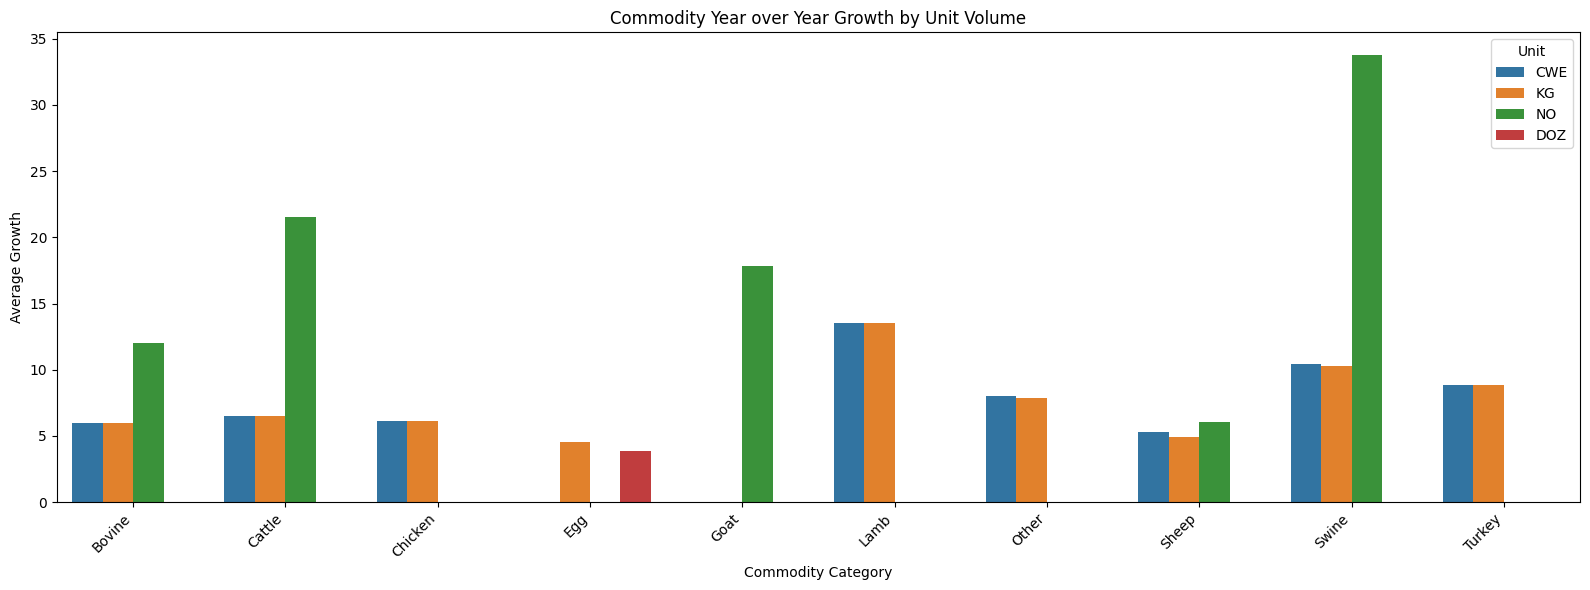

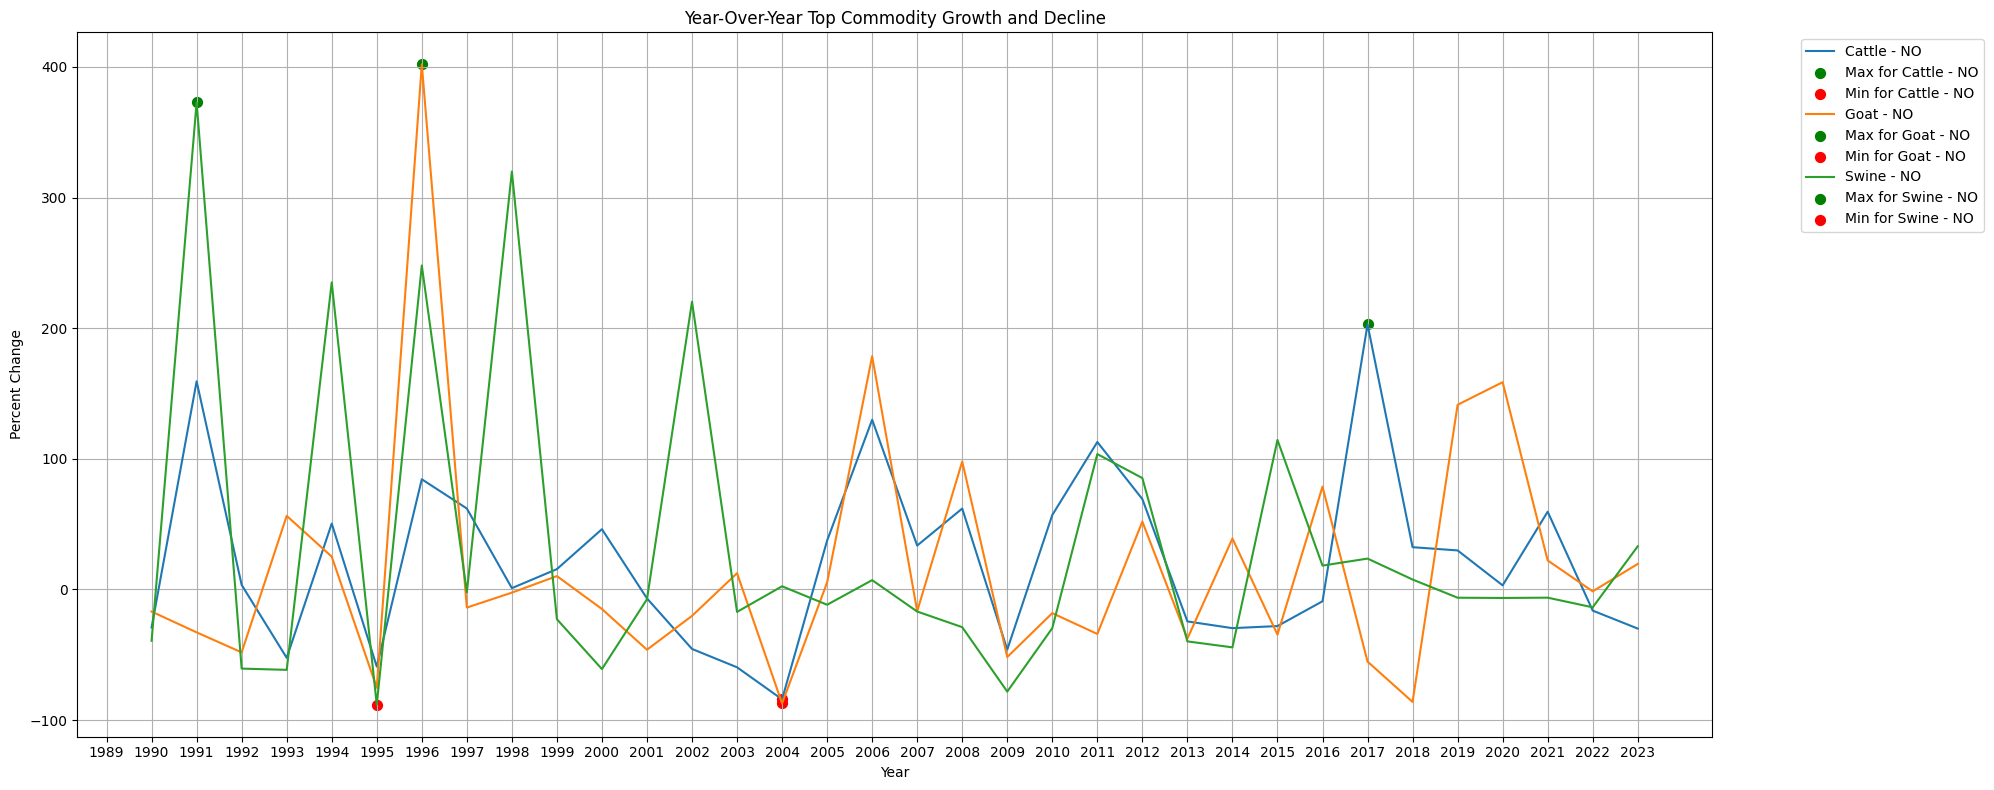

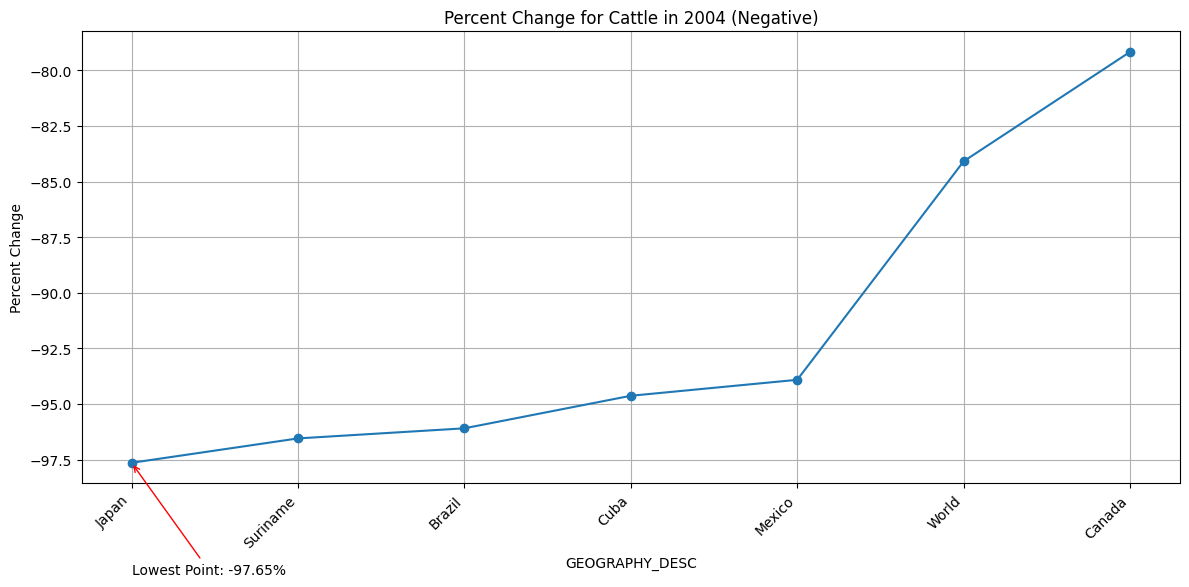

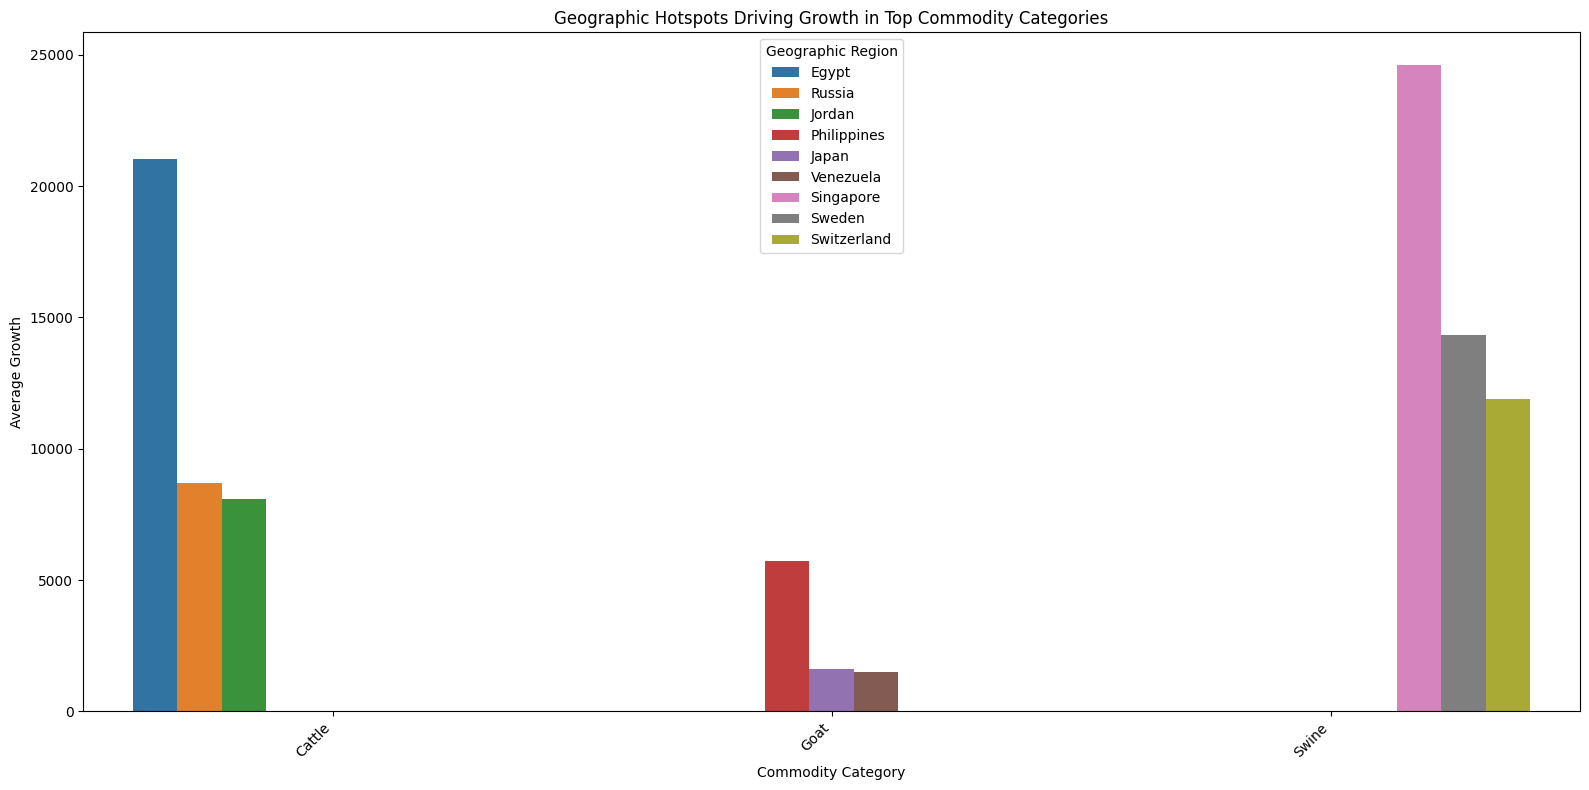

In [ ]:
# Enter the code for your Project 1.2 visualizations here.

# Chart 1
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.barplot(x='COMMODITY_CAT', y='year_over_year_pct_change', hue='UNIT_DESC', data=average_pct_change)
plt.title('Commodity Year Over Year Growth by Unit Volume')
plt.xlabel('Commodity Category')
plt.ylabel('Average Growth')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.legend(title="Unit")
plt.tight_layout()
plt.show()

# Chart 2
plt.figure(figsize=(20, 8))  # Adjust figure size for better readability

for commodity, group in filtered_yearly_sums.groupby(['COMMODITY_CAT', 'UNIT_DESC']):
    plt.plot(group['YEAR'], group['pct_change'], label=f"{commodity[0]} - {commodity[1]}")

    # Emphasize max and min points
    max_idx = group['pct_change'].idxmax()
    min_idx = group['pct_change'].idxmin()
    plt.scatter(group.loc[max_idx, 'YEAR'], group.loc[max_idx, 'pct_change'], color='green', marker='o', s=50, label=f'Max for {commodity[0]} - {commodity[1]}')
    plt.scatter(group.loc[min_idx, 'YEAR'], group.loc[min_idx, 'pct_change'], color='red', marker='o', s=50, label=f'Min for {commodity[0]} - {commodity[1]}')

plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Year-Over-Year Top Commodity Growth and Decline')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.xticks(filtered_yearly_sums['YEAR'].unique()) # Show all unique years on x-axis
plt.tight_layout() # Prevent labels from overlapping
plt.show()

# Chart 3
# Filter data for Cattle in 2004 with negative pct_change
cattle_2004_negative = geography_yearly_sums[
    (geography_yearly_sums['COMMODITY_CAT'] == 'Cattle') &
    (geography_yearly_sums['YEAR'] == 2004) &
    (geography_yearly_sums['pct_change'] < 0)
]

# Sort to find the lowest point
cattle_2004_negative_sorted = cattle_2004_negative.sort_values(by='pct_change')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(cattle_2004_negative_sorted['GEOGRAPHY_DESC'], cattle_2004_negative_sorted['pct_change'], marker='o')
plt.xlabel('GEOGRAPHY_DESC')
plt.ylabel('Percent Change')
plt.title('Percent Change for Cattle in 2004 (Negative)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)

# Annotate the lowest point
min_point = cattle_2004_negative_sorted['pct_change'].min()
min_index = cattle_2004_negative_sorted['pct_change'].idxmin()
min_geography = cattle_2004_negative_sorted.loc[min_index, 'GEOGRAPHY_DESC']

plt.annotate(f'Lowest Point: {min_point:.2f}%',
             xy=(min_geography, min_point),
             xytext=(min_geography, min_point - 5), # Adjust position as needed
             arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

# Chart 4
plt.figure(figsize=(16, 8))
sns.barplot(x='COMMODITY_CAT', y='geography_year_over_year_pct_change', hue='GEOGRAPHY_DESC', data=top_3_geography)
plt.title('Geographic Hotspots Driving Growth in Top Commodity Categories')
plt.xlabel('Commodity Category')
plt.ylabel('Average Growth')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.legend(title="Geographic Region")
plt.tight_layout()
plt.show()



### Task 1.3 Research Questions and Answers
## Overview
The Livestock and Meat International Trade Data product provides monthly and annual data on exports of various livestock and meat products, including live cattle, hogs, sheep, goats, beef, pork, lamb, poultry (chicken and turkey), eggs, and egg products. The data, based on official U.S. Census trade statistics, is reported in carcass-weight-equivalent (CWE) pounds for meat products and dozen equivalents for eggs. Live animal numbers are reported as-is without conversion. The dataset does not include dairy products or financial figures such as dollar values or unit prices.

The dataset includes historical data back to 1989 and offers detailed breakdowns by country of export. It can be used to analyze trends in exports, domestic production, and USDA World Agricultural Supply and Demand Estimates (WASDE). <br><br>
<b>1. Which commodity categories, in terms of unit volume, exhibited the highest rate of growth over the 34-year period of the dataset? </b><br>
To identify the fastest-growing commodity categories between 1989 and 2023, I began by categorizing commodities based on their description and units. This categorization was crucial to ensure consistent comparisons across different products.This dataset leverages U.S. Census trade data, converting it to standardized units (CWE-Carcuss Weight Equivalent pounds for meat, DOZ-dozen equivalents for eggs, KG-kilogram) to align with USDA WASDE standards. Live animal numbers remain unchanged (NO).<br>
Swine, Cattle, and Goat, measured in units of live animals (NO), emerged as the top three categories with the highest growth rates: 33.8%, 21.5%, and 17.8%, respectively. This can also be seen in the chart "Commodity Year Over Year Growth by Unit Volume".<br>

<b>2. When did the top 3 commodities experience their best and worst annual growth?</b><br>
Swine saw a dramatic 373% surge in 1991, followed by a sharp 88% decline in 1995. Cattle experienced significant growth in 2017 (203%) but suffered a severe downturn in 2004 (-84%). Goat's most prosperous year was 1996 (401% increase), while 2004 marked its worst (-87%). This can be seen in the chart "Year-Over-Year Top Commodity Growth and Decline". The tables below also summarize the data.<br>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Commodity</th>
      <th>Unit</th>
      <th>Year</th>
      <th>Increase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Swine</td>
      <td>NO</td>
      <td>1991</td>
      <td>373%</td>
    </tr>
    <tr>
      <td>Cattle</td>
      <td>NO</td>
      <td>2017</td>
      <td>203%</td>
    </tr>
    <tr>
      <td>Goat</td>
      <td>NO</td>
      <td>1996</td>
      <td>401%</td>
    </tr>
  </tbody>
</table>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Commodity</th>
      <th>Unit</th>
      <th>Year</th>
      <th>Decrease</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Swine</td>
      <td>NO</td>
      <td>1995</td>
      <td>-88%</td>
    </tr>
    <tr>
      <td>Cattle</td>
      <td>NO</td>
      <td>2004</td>
      <td>-84%</td>
    </tr>
    <tr>
      <td>Goat</td>
      <td>NO</td>
      <td>2004</td>
      <td>-87%</td>
    </tr>
  </tbody>
</table>
Having worked in the cattle industry for the past 3 years, I was intrigued by the sharp drop in exports during 2004. Further research revealed that the discovery of bovine spongiform encephalopathy (BSE), also knows as mad cow disease in a U.S. cow on December 23, 2003, resulted in the most significant yearly decline in cattle export history. This event triggered immediate import restrictions or bans from major markets, including Japan, leading to a sharp decline in U.S. beef exports for 2004. It is noteworthy that my analysis aligns closely with the findings presented in a 2014 study by the University of Nebraska-Lincoln's Department of Agricultural Economics (https://agecon.unl.edu/cornhusker-economics/2014/u.s.-beef-trade-disruptions).  Their research indicates an 83% decline in the value of U.S. beef exports from 2003 to 2004, a figure that aligns within 1% of my own calculations based on the aforementioned event. The chart "Percent Change for Cattle in 2004 (Negative)" clearly shows that Japan exhibited the sharpest decrease, just as my research showed. <br>

<b>3. Where, geographically, did the 3 top-growing commodity categories by unit volume see the highest rates of increase?</b><br>
Swine experienced significant growth in Singapore, Sweden, and Switzerland. Cattle saw substantial growth in Egypt, Russia, and Jordan. Goat exhibited notable growth in the Philippines, Japan, and Venezuela. This can also be seen on the chart "Geographic Hotspots Driving Growth in Top Commodity Categories".

## Task 2: Web Scraping

President Wendler has proposed facutly at WT use Open Educational Resources (OER) or instructor created content to lower the cost of text-books and other educational material. To help decision makers, we want to analize what the University of Houston has done regarding OER. The University of Houston offers grant awards to faculty who convert their courses to OER and OER-like content while maintaining the quality of the educational materials. Your task is to perform webscrapping on their website to analyze the data.

Tasks:
1. Web scrape all the tables of data at https://guides.lib.uh.edu/OER/ATIP/awardees
2. Store the data from all the tables into one pandas dataframe with columns "Year", "Name", "College", and "Course". Sort the data by year.

Data Dictionary:<br>
*Year* is the year the award was granted, e.g. "2022"<br>
*Name* is the text in the Name column. You are not required to split the faculty names. What ever text is in the name column, use that value, e.g., "Chiara Acquati, Aabha Brown, and Ginger Lucas"<br>
*College*. Name of the college from the College column, e.g., "Liberal Arts & Social Sciences"<br>
*Course*. Prefix, Number and Name of the course, e.g., "PSYC 2305: Introduction to Methods in Psychology"<br>

3. Think of a research question you can analize with this data. In a Colab textbox "Project 2.2", write your research question and answer. One paragraph will be sufficient.

4. Create a simple visualization to support your major finding from the research question. Label your x and y axis (with unit of measure) and add a title to your visualization.

5. The hardest part of this project is that there are various tables without unique identifiers. Pandas and beautiful soup may return a list of tables that you have to manage. Consider learning about the "Pandas read_html()" method. Search that term and possibly "pandas read multiple tables into dataframe".

### Resources
1. You learned about request and beautiful soup in datacamp and in <a href="https://docs.google.com/document/d/1tnX9QWzl9_nbnfhzbbS7PP7Gnmp4TMnmAEmkOFU1gh4/edit?usp=sharing"> CIDM6303 Lesson 11</a>
2. Dr. Humpherys shared a <a href="https://www.screencast.com/t/tOA2g2tV" >video of a code walkthrough</a> collecting consumer data from auto websites.
3. Consider searching Google and youtube for "python web scrapping"
4. Datacamp has an article on <a href="https://www.datacamp.com/tutorial/scraping-reddit-python-scrapy?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=676354849673&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9028461&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-us_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-oct23&gclid=Cj0KCQjwy4KqBhD0ARIsAEbCt6gnUPZDC4xg8cq5CLElNibxJM8KJE6PlWm5pm7Qpyzu7VeOUCm1pSQaAr8ZEALw_wcB" target="blank">web scraping here </a>
4. Datacamp has an extra course just on web scraping. https://app.datacamp.com/learn/courses/web-scraping-with-python





In [ ]:
# Project 2.1 Code
#!pip install requests
#!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://guides.lib.uh.edu/OER/ATIP/awardees"
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

# Find all year headings and corresponding tables
years = soup.find_all('h2', class_='s-lib-box-title')

data = []

# Loop over each year and extract the data
for year in years:
    year_text = year.get_text(strip=True)

    # Find the table for this year
    table = year.find_next('div', {'id': lambda x: x and x.startswith('s-lg-box-collapse')})

    # Extract rows of the table
    rows = table.find_all('tr')

    # Load Name, College, and Course from rows
    for row in rows:
        columns = row.find_all('td')
        if len(columns) >= 3:
            name = columns[0].get_text(strip=True)
            college = columns[1].get_text(strip=True)
            course = columns[2].get_text(strip=True)
            # Add to the corresponding year
            data.append([year_text, name, college, course])

df = pd.DataFrame(data, columns=['Year', 'Name', 'College', 'Course'])

# Sort by Year
df_sorted = df.sort_values(by='Year')
df_sorted



,Year,Name,College,Course
89,2018,Sandra Thompson,Law,LAW 5357: Evidence
75,2018,Samuel Brower,Education,ELED 4320: Social Studies in the Elementary Sc...
76,2018,Alexander Bruton,Liberal Arts & Social Sciences,SPAN 4397: Contemporary Spain
77,2018,Teresa Edgar,Education,CUIN 3317: Kindergarten and Elementary Curricu...
78,2018,Terry Kirk and Sandra Lee,Nursing,NURS 4520: Concept Integration in Patient Care...
...,...,...,...,...
4,2024,"Marédil León, Tairan Qiu, & Velvette Laurence",Education,CUIN 4361: Second Language Methodology / Resou...
3,2024,Nouhad Rizk,Natural Sciences and Mathematics,COSC 4337: Data Science II
2,2024,María Elena Soliño,Liberal Arts & Social Sciences,HISP 2373: Spanish Culture and Civilization
1,2024,Melody Yunzi Li,Liberal Arts & Social Sciences,CHNS 3344: Global Chinese Literature


In [ ]:
# Group by 'Name' and 'Year' and aggregate 'Course' and 'College' into lists
name_year_data = df_sorted.groupby(['Name', 'Year'])[['Course', 'College']].agg(list).reset_index()

# Group by 'Name' and count occurrences of the name
# NOTE: there could be a tie
name_counts = df_sorted.groupby('Name')['Year'].count()
max_count = name_counts.max()
most_frequent_names = name_counts[name_counts == max_count].index

# Print the result with Name, Year, College, and Course
print("Most frequent name(s) with their years, colleges, and courses:")
for name in most_frequent_names:
    # Filter the data for each most frequent name
    name_data = name_year_data[name_year_data['Name'] == name]

    for _, row in name_data.iterrows():
        # Get the years, courses, and colleges for this name
        years = row['Year']
        courses = row['Course']
        colleges = row['College']

        # Print the data for this name, including years, colleges, and courses
        for year, course, college in zip(years, courses, colleges):
            print(f"{name} ({years}): Course: {course}, College: {college}")


Most frequent name(s) with their years, colleges, and courses:
Jose Angel Hernandez (2022): Course: HIST 2303: Historian’s Craft, College: Liberal Arts & Social Sciences
Jose Angel Hernandez (2022): Course: HIST 4336: History of Histories: Historiography Capstone Seminar, College: Liberal Arts & Social Sciences
Jose Angel Hernandez (2023): Course: HIST 2367: History of Mexico, College: Liberal Arts & Social Science
Nouhad Rizk (2018): Course: COSC 2430: Data Structures, College: Natural Sciences & Mathematics
Nouhad Rizk (2019): Course: COSC 4335/3337: Data Science, College: Natural Sciences & Mathematics
Nouhad Rizk (2024): Course: COSC 4337: Data Science II, College: Natural Sciences and Mathematics


In [ ]:
# Group by college and count occurrences
college_counts = df_sorted.groupby('College')['Year'].count()

# Find the most frequent college
# NOTE: there could be a tie!
max_count = college_counts.max()
most_frequent_colleges = college_counts[college_counts == max_count].index

# Find the least frequent college
# NOTE: there could be a tie!
min_count = college_counts.min()
# Get all colleges with the minimum count
least_frequent_colleges = college_counts[college_counts == min_count].index

print("The college(s) that occur(s) most frequently is/are:")
print(list(most_frequent_colleges))
print(f"It/They occur(s) {max_count} times.")
print("The college(s) that occur(s) least frequently is/are:")
print(list(least_frequent_colleges))
print(f"It/They occur(s) {min_count} times.")

The college(s) that occur(s) most frequently is/are:
['Liberal Arts & Social Sciences']
It/They occur(s) 30 times.
The college(s) that occur(s) least frequently is/are:
['Arts', 'Law', 'Medicine', 'Natural Sciences and Mathematics', 'Nursing', 'Pharmacy']
It/They occur(s) 1 times.


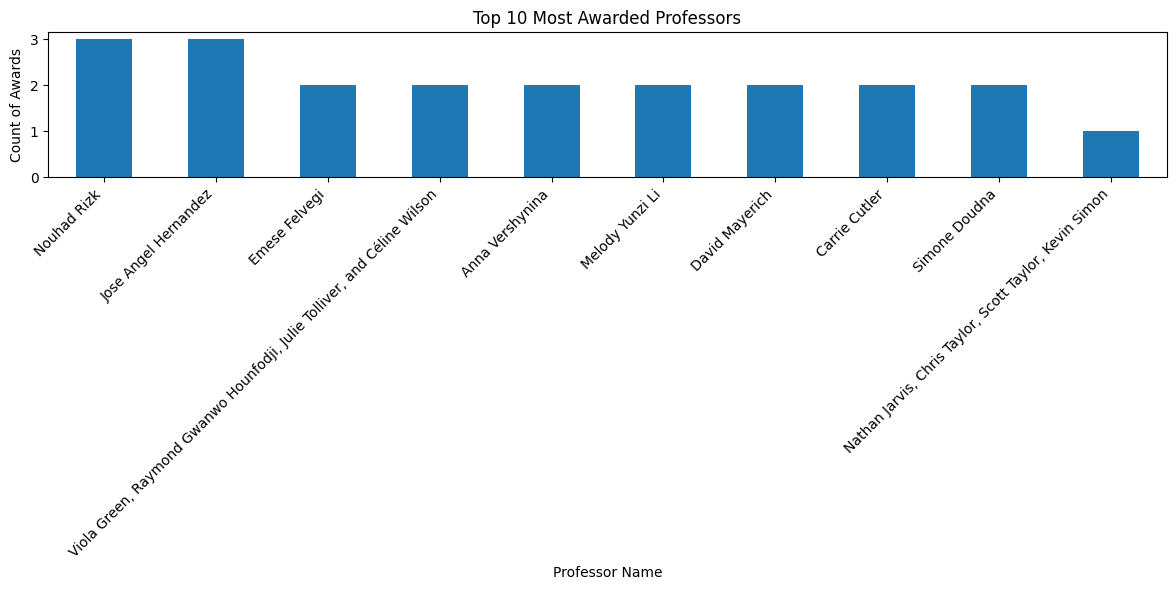

In [ ]:
# Group by name and count occurrences
name_counts = df_sorted.groupby('Name')['Year'].count()

# Sort in descending order and get the top 10
top_10_names = name_counts.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
top_10_names.plot(kind='bar')
plt.title('Top 10 Most Awarded Professors')
plt.xlabel('Professor Name')
plt.ylabel('Count of Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

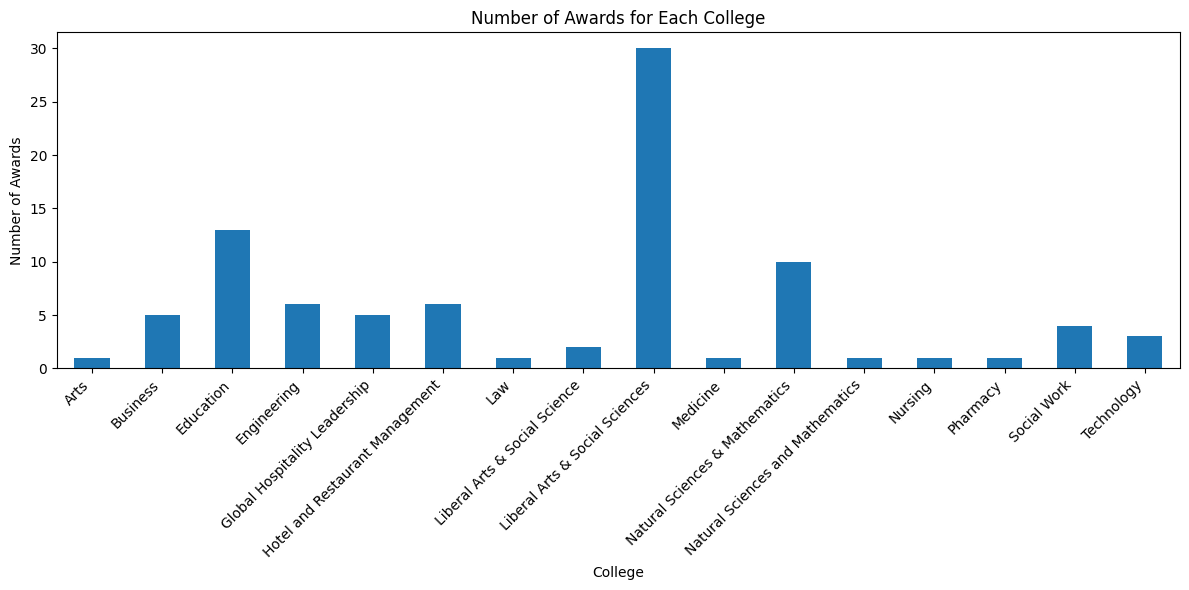

In [ ]:
import matplotlib.pyplot as plt
college_counts = df_sorted.groupby('College')['Year'].count()

plt.figure(figsize=(12, 6))
college_counts.plot(kind='bar')
plt.title('Number of Awards for Each College')
plt.xlabel('College')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Task 2.2 Research Question and Answer.
<b>1. Who are the most awarded professors, and in what years, courses, and colleges did they receive their awards?</b><br>
The most awarded professors are Jose Angel Hernandez and Nouhad Rizk with 3 awards each. Their awards are listed below. Their counts can also be seen in the chart "Top 10 Most Awarded Professors". Pleas note that the determination of the most awarded professor was based solely on precise name matching. Substring-based comparisons were not utilized to avoid potential inaccuracies. <br>

Jose Angel Hernandez (2022): Course: HIST 2303: Historian’s Craft, College: Liberal Arts & Social Sciences
Jose Angel Hernandez (2022): Course: HIST 4336: History of Histories: Historiography Capstone Seminar, College: Liberal Arts & Social Sciences
Jose Angel Hernandez (2023): Course: HIST 2367: History of Mexico, College: Liberal Arts & Social Science
Nouhad Rizk (2018): Course: COSC 2430: Data Structures, College: Natural Sciences & Mathematics
Nouhad Rizk (2019): Course: COSC 4335/3337: Data Science, College: Natural Sciences & Mathematics
Nouhad Rizk (2024): Course: COSC 4337: Data Science II, College: Natural Sciences and Mathematics <br><br>

<b>2. Which college(s) is/are the most awarded? Which college(s) is/are the least awarded?</b><br>
Liberal Arts and Social Sciences is the clear leader in terms of awards, with 30 recognitions. In contrast, Arts, Law, Medicine, Natural Sciences and Mathematics, Nursing, and Pharmacy have each received a single award.
This can clearly be seen in chart "Number of Awards for each College".<br><br>
A critical observation from the chart "Number of Awards for each College" is the inconsistency in college names. For instance, "Liberal Arts & Social Sciences" and "Liberal Arts & Social Science" appear multiple times. "Natural Sciences & Mathematics" and "Natural Sciences and Mathematics" also appear multiple times. While this may seem like a minor detail, I believe it detracts from the overall professionalism of the presentation and can affect data analysis.<br>

## DONE!

Upload the url of your notebook to WTclass.

## Grading Rubric:  

Task 1 is 50%. Task 2 is 50%. <br>
Task 1.1 is 30%, which includes 2% for each cleaning/transforming operation.<br>
Task 1.2 is 10% for working code. <br>
Task 1.3 is 10%, which includes 5% for each of two research questions, answers, and respective visualization(s). <br>
Task 2.1 is 40% for working code as instructed. <br>
Task 2.2 is 10% research question, answer, and respective visualization.<br>
Partial credit may be awarded.  


